# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# Loop through the list of cities and perform a request for data on each

city_number = 0
name = []
temp = []
humy =[]
lat = []
lng =[]
cloud = []
wind =[]
country =[]


for city in cities:
    print(f" City number {city_number}  city name: {city}")
    try:
        response = requests.get(query_url + city).json()
        
        city_number = city_number +1
        name.append(response['name'])
        temp.append(response['main']['temp_max'])
        humy.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        cloud.append(response['clouds']['all'])
        wind.append(response ['wind']['speed'])
        country.append(response['sys']['country'])
    except:
        print ('City not found')


 City number 0  city name: chekhov
 City number 1  city name: rikitea
 City number 2  city name: taolanaro
City not found
 City number 3  city name: riyadh
 City number 4  city name: san carlos de bariloche
 City number 5  city name: tasiilaq
 City number 6  city name: mar del plata
 City number 7  city name: barra do bugres
 City number 8  city name: pangnirtung
 City number 9  city name: klaksvik
 City number 10  city name: atuona
 City number 11  city name: wanaka
 City number 12  city name: dvinskoy
 City number 13  city name: victoria
 City number 14  city name: alice springs
 City number 15  city name: sydney mines
 City number 16  city name: vaini
 City number 17  city name: hilo
 City number 18  city name: mataura
 City number 19  city name: hermanus
 City number 20  city name: faanui
 City number 21  city name: jiujiang
 City number 22  city name: bluff
 City number 23  city name: umm durman
City not found
 City number 24  city name: lompoc
 City number 25  city name: nizhneya

 City number 205  city name: castro
 City number 206  city name: hithadhoo
 City number 207  city name: tabialan
City not found
 City number 208  city name: grindavik
 City number 209  city name: fairbanks
 City number 210  city name: hervey bay
 City number 211  city name: luwuk
 City number 212  city name: teresina
 City number 213  city name: havre-saint-pierre
 City number 214  city name: jalu
 City number 215  city name: bilma
 City number 216  city name: hualmay
 City number 217  city name: ugoofaaru
 City number 218  city name: teahupoo
 City number 219  city name: ixtapa
 City number 220  city name: kubrat
 City number 221  city name: weligama
 City number 222  city name: vaitupu
City not found
 City number 223  city name: new hope
 City number 224  city name: flinders
 City number 225  city name: gaoua
 City number 226  city name: amahai
 City number 227  city name: sao joao da barra
 City number 228  city name: norman wells
 City number 229  city name: sungaipenuh
 City numbe

 City number 414  city name: sao felix do xingu
 City number 415  city name: killybegs
 City number 416  city name: bandrele
 City number 417  city name: trinidad
 City number 418  city name: the valley
 City number 419  city name: mezhdurechensk
 City number 420  city name: shakawe
 City number 421  city name: tulun
 City number 422  city name: moses lake
 City number 423  city name: seoul
 City number 424  city name: laguna
 City number 425  city name: charlottetown
 City number 426  city name: san jose de guanipa
 City number 427  city name: chicama
 City number 428  city name: townsville
 City number 429  city name: macaboboni
City not found
 City number 430  city name: suntar
 City number 431  city name: puerto rondon
 City number 432  city name: margate
 City number 433  city name: bilibino
 City number 434  city name: vila
 City number 435  city name: cervo
 City number 436  city name: sorong
 City number 437  city name: balykshi
City not found
 City number 438  city name: rebri

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
raw={ 'City Name': name,'Temperature': temp, "Humidity": humy, "Latitude": lat, "Longitude": lng, "Cloudiness" : cloud, "Wind Speed": wind , "Country" : country}
    
df=pd.DataFrame(raw)
df


,City Name,Temperature,Humidity,Latitude,Longitude,Cloudiness,Wind Speed,Country
0,Chekhov,-1.00,92,55.14,37.47,75,4.00,RU
1,Rikitea,26.37,79,-23.12,-134.97,75,6.53,PF
2,Riyadh,9.00,39,24.69,46.72,0,3.10,SA
3,Bariloche,12.00,58,-41.15,-71.31,20,8.70,AR
4,Tasiilaq,-5.00,79,65.61,-37.64,100,9.80,GL
...,...,...,...,...,...,...,...,...
551,Sebring,16.11,87,27.50,-81.44,1,4.10,US
552,Klamath Falls,11.00,34,42.22,-121.78,1,6.70,US
553,Challakere,23.26,55,14.32,76.65,20,6.12,IN
554,Norilsk,-35.00,73,69.35,88.20,0,2.00,RU


In [30]:
# Output File (CSV)
df.to_csv("output_data/cities.csv")


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

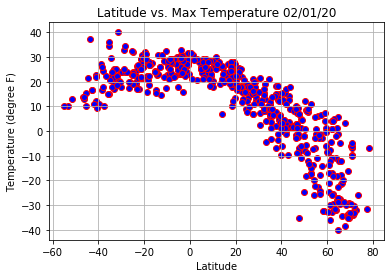

In [7]:
# Create a scatter plot for Latitude and Temperature
plt.scatter(df["Latitude"], df["Temperature"], marker = "o", facecolor = "blue", edgecolor="red")
plt.title("Latitude vs. Max Temperature %s" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Temperature (degree F)")
plt.grid()
plt.savefig("Output_data/Images/temp.png")



#### Latitude vs. Humidity Plot

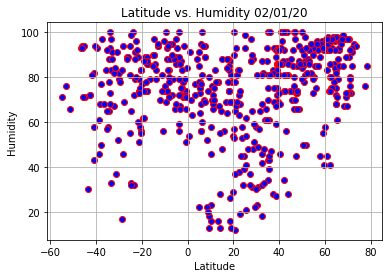

In [8]:
# Create a scatter plot for Latitude and humidity
plt.scatter(df["Latitude"], df["Humidity"], marker = "o", facecolor = "blue", edgecolor="red")
plt.title("Latitude vs. Humidity %s" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("Output_data/Images/Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

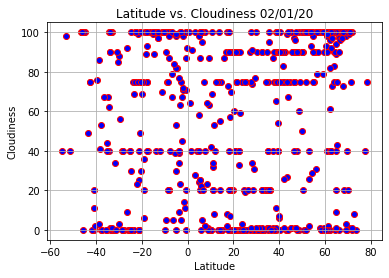

In [9]:
# Create a scatter plot for Latitude and Cloudiness
plt.scatter(df["Latitude"], df["Cloudiness"], marker = "o", facecolor = "blue", edgecolor="red")
plt.title("Latitude vs. Cloudiness %s" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("Output_data/Images/cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

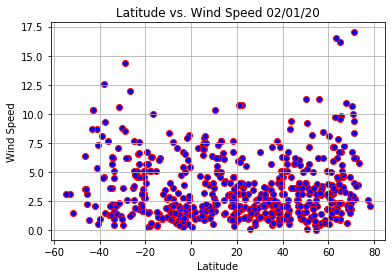

In [10]:
# Create a scatter plot for Latitude and Wind Speed 
plt.scatter(df["Latitude"], df["Wind Speed"], marker = "o", facecolor = "blue", edgecolor="red")
plt.title("Latitude vs. Wind Speed %s" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("Output_data/Images/Wind.png")


plt.show()


## Linear Regression

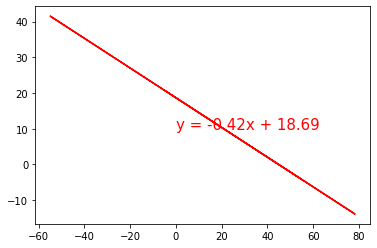

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
# Run linear regression
x_values = df["Latitude"]
y_values = df["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")

plt.show()

In [12]:
# Create Northern and Southern Hemisphere DataFrames
north_df = df.loc[df['Latitude']>0]
south_df = df.loc[df['Latitude']<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

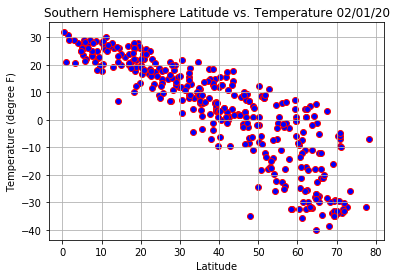

In [13]:
# Create a scatter plot for Latitude and Temperature
plt.scatter(north_df["Latitude"],north_df["Temperature"], marker = "o", facecolor = "blue", edgecolor="red")
plt.title("Southern Hemisphere Latitude vs. Temperature %s" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Temperature (degree F)")
plt.grid()
plt.savefig("Output_data/Images/SH_temp.png")
plt.show()

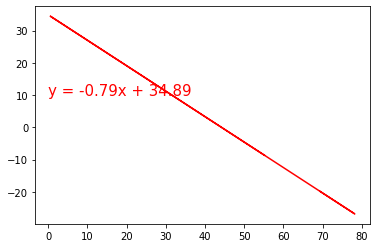

In [14]:
# Run linear regression
x_values = north_df["Latitude"]
y_values = north_df["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

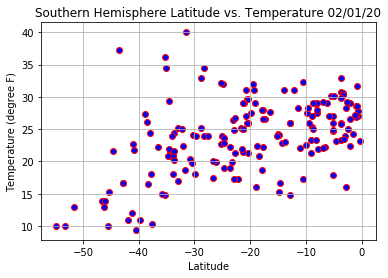

In [15]:
# Create a scatter plot for Latitude and Temperature
plt.scatter(south_df["Latitude"],south_df["Temperature"], marker = "o", facecolor = "blue", edgecolor="red")
plt.title("Southern Hemisphere Latitude vs. Temperature %s" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Temperature (degree F)")
plt.grid()
plt.savefig("Output_data/Images/SH_temp.png")
plt.show()

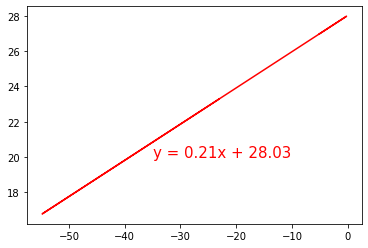

In [16]:
# Run linear regression
x_values = south_df["Latitude"]
y_values = south_df["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,20),fontsize=15,color="red")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

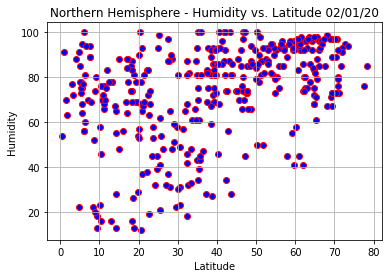

In [17]:
# Create a scatter plot for Latitude and humidity
plt.scatter(north_df["Latitude"], north_df["Humidity"], marker = "o", facecolor = "blue", edgecolor="red")
plt.title("Northern Hemisphere - Humidity vs. Latitude %s" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("Output_data/Images/NH_Humidity.png")
plt.show()

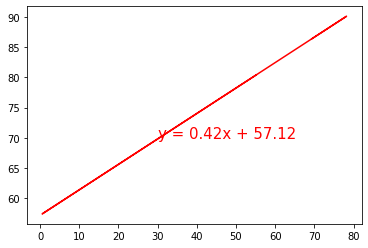

In [18]:
# Run linear regression
x_values = north_df["Latitude"]
y_values = north_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,70),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

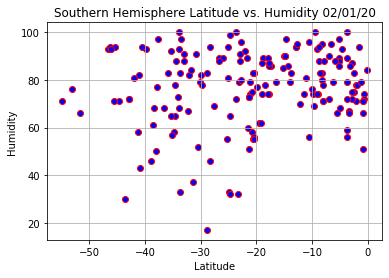

In [19]:
# Create a scatter plot for Latitude and humidity
plt.scatter(south_df["Latitude"], south_df["Humidity"], marker = "o", facecolor = "blue", edgecolor="red")
plt.title("Southern Hemisphere Latitude vs. Humidity %s" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("Output_data/Images/SH_Humidity.png")
plt.show()

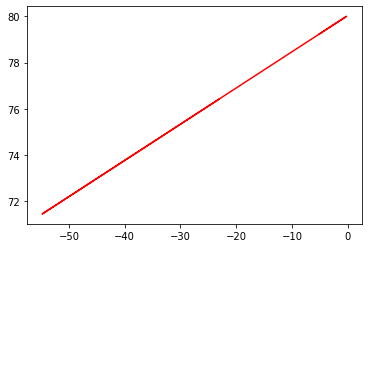

In [20]:
# Run linear regression
x_values = south_df["Latitude"]
y_values = south_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,65),fontsize=15,color="red")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

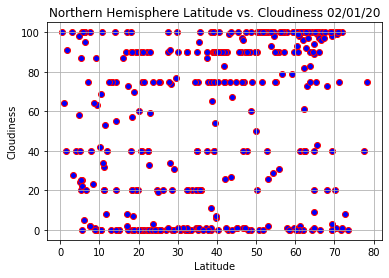

In [21]:
# Create a scatter plot for Latitude and Cloudiness
plt.scatter(north_df["Latitude"], north_df["Cloudiness"], marker = "o", facecolor = "blue", edgecolor="red")
plt.title("Northern Hemisphere Latitude vs. Cloudiness %s" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("Output_data/Images/NH_cloudiness.png")
plt.show()

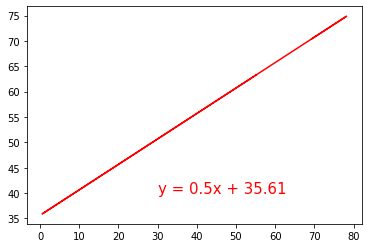

In [22]:
# Run linear regression
x_values = north_df["Latitude"]
y_values = north_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,40),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

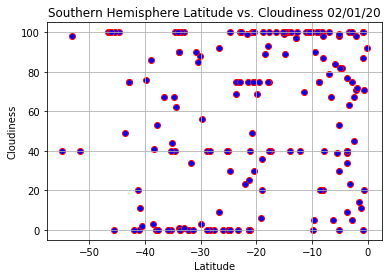

In [23]:
# Create a scatter plot for Latitude and Cloudiness
plt.scatter(south_df["Latitude"], south_df["Cloudiness"], marker = "o", facecolor = "blue", edgecolor="red")
plt.title("Southern Hemisphere Latitude vs. Cloudiness %s" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.savefig("Output_data/Images/SH_cloudiness.png")
plt.show()

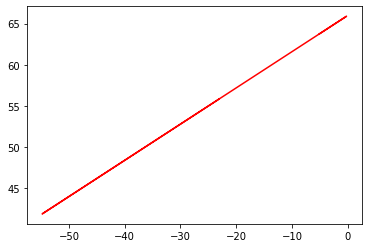

In [24]:
# Run linear regression
x_values = south_df["Latitude"]
y_values = south_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

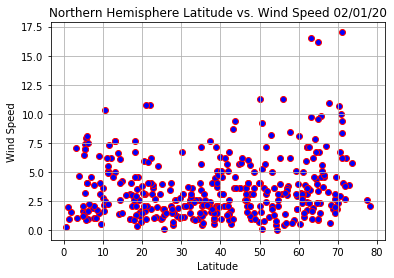

In [25]:
# Create a scatter plot for Latitude and Wind Speed 
plt.scatter(north_df["Latitude"], north_df["Wind Speed"], marker = "o", facecolor = "blue", edgecolor="red")
plt.title("Northern Hemisphere Latitude vs. Wind Speed %s" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("Output_data/Images/NH_Wind.png")
plt.show()

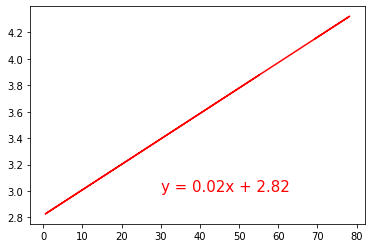

In [26]:
# Run linear regression
x_values = north_df["Latitude"]
y_values = north_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,3),fontsize=15,color="red")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

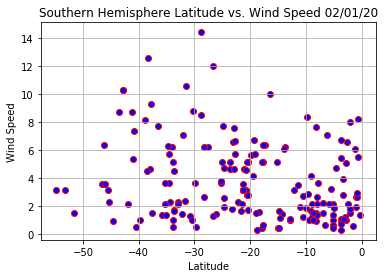

In [27]:
# Create a scatter plot for Latitude and Wind Speed 
plt.scatter(south_df["Latitude"], south_df["Wind Speed"], marker = "o", facecolor = "blue", edgecolor="red")
plt.title("Southern Hemisphere Latitude vs. Wind Speed %s" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.savefig("Output_data/Images/SH_Wind.png")
plt.show()

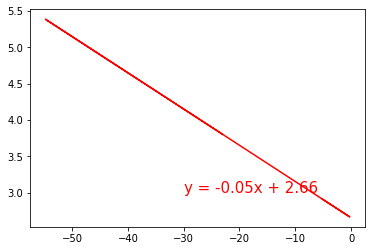

In [28]:
# Run linear regression
x_values = south_df["Latitude"]
y_values = south_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,3),fontsize=15,color="red")

plt.show()